In [1]:
# Public libraries
%matplotlib inline
import numpy as np
import latex
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
from lmfit import Model, Parameters

# Customized libraries
from RTclass import RT
from fit_models import PLL_model, PLL_model2, Quadra_model, Linear_model
#import scienceplots

In [2]:
print("lmfit version:", lmfit.__version__)

lmfit version: 1.3.2


# 1. Load the data for doping level of 0.17

In [3]:
p017 = RT(0.17, 'LSCO')  # Initializes the object
p017.load_RT_LSCO(r"./LSCO_p017.txt") # replace this with the new file path
p017.Rdata = p017.Rdata*0.001  # Converts the unit from micro-Ohm*cm to milli-Ohm*cm

The shape of T_data and R_data is: (170,), (170,)
Data of LSCO p=0.17 loaded successfully!


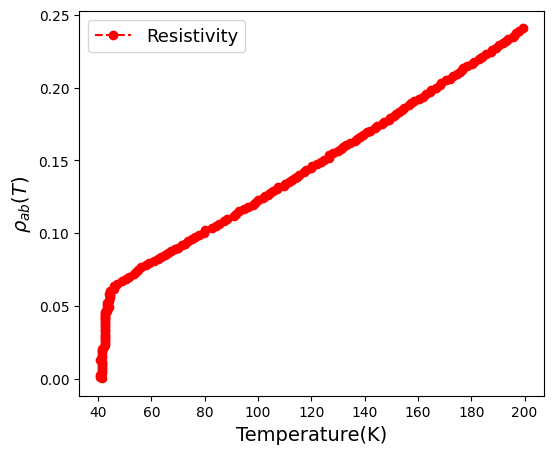

In [4]:
p017.plot()  # Take a quick look on the data

# 2. PLL fittings with the model: PLL_model2

## a. Single fit

[[Model]]
    Model(pll_func2)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 589
    # data points      = 17
    # variables        = 3
    chi-square         = 2.4515e-06
    reduced chi-square = 1.7511e-07
    Akaike info crit   = -261.784439
    Bayesian info crit = -259.284799
    R-squared          = 0.99729714
[[Variables]]
    R0:     0.14540844 +/- 0.02935077 (20.19%) (init = 1.7e-11)
    A:      0.02849640 +/- 0.05525819 (193.91%) (init = 0.001)
    alpha:  1.41881483 +/- 0.50439824 (35.55%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, alpha)  = +1.0000
    C(R0, alpha) = +0.9992
    C(R0, A)     = +0.9989


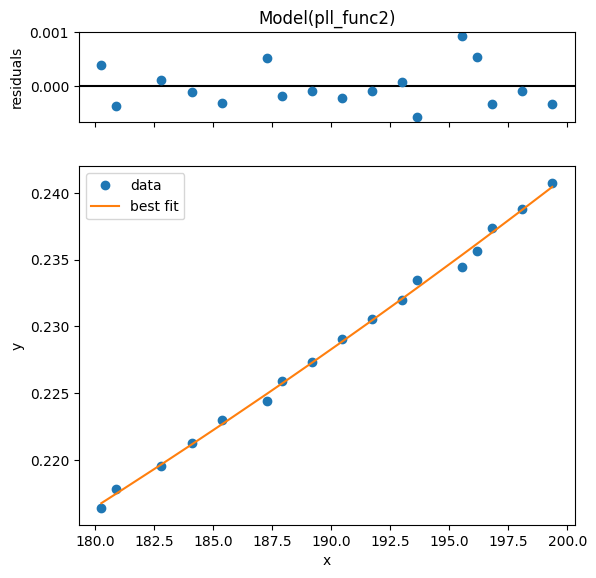

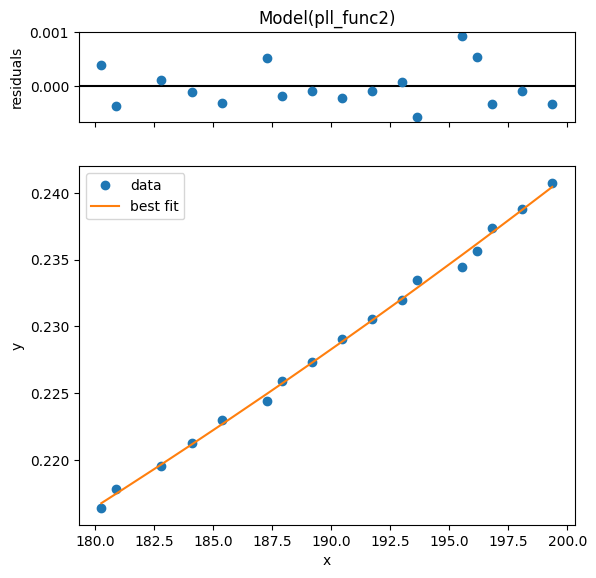

In [5]:
T_wave, R_wave = p017.crop_RT(180) # Fit the data from 180K and above
xdata, ydata = T_wave, R_wave

# 2. Prepare the parameters
params = PLL_model2.make_params()
params

# 3. Initialize & configure the parameters
params['R0'].set(value=1.7e-11, min=0)
params['alpha'].set(value=0.5)
params['A'].set(value=0.001)

result = PLL_model2.fit(ydata, params, x=xdata, method="least_squares")
print(result.fit_report())

result.plot()

In [6]:
# Check whether the fit was successful
result.success

True

## b. Group fit for (180, 30)K

In [7]:
# Initialize the params and select T-range
params = result.params
T_i, T_f = 180, 30 

#2. Apply the group fit
p017.group_fit(PLL_model2, params, T_i, T_f, method="least_squares")  # Apply the fittting for data from 180K and above, and then 178, 177.... until fitting from 30K and above
results = p017.results

#3. Obtain the DataFrame from results
attr_list = ['success', 'errorbars', 'message', 'ier', 'chisqr', 'redchi', 'aic', 'bic', 'nvarys', 'ndata', 'nfree']
df = p017.df_fitreport(attr_list) # generates a Dataframe that summarizes some fitting statistics for each slice of fit
df 

The group fit was applied for 180 to 30K, with the fitting model: Model(pll_func2)


,success,errorbars,message,ier,chisqr,redchi,aic,bic,nvarys,ndata,nfree
180.254777,True,True,`gtol` termination condition is satisfied.,0,0.000002,1.751068e-07,-261.784439,-259.284799,3,17,14
178.343949,True,True,`gtol` termination condition is satisfied.,0,0.000002,1.662061e-07,-278.262457,-275.591342,3,18,15
177.070064,True,True,`gtol` termination condition is satisfied.,0,0.000002,1.559438e-07,-295.066784,-292.233467,3,19,16
176.433121,True,True,`gtol` termination condition is satisfied.,0,0.000003,1.690250e-07,-309.114768,-306.127571,3,20,17
175.796178,True,True,`gtol` termination condition is satisfied.,0,0.000004,2.009518e-07,-321.061376,-317.927809,3,21,18
...,...,...,...,...,...,...,...,...,...,...,...
41.401274,True,True,`gtol` termination condition is satisfied.,0,0.025455,1.552144e-04,-1461.734723,-1452.380742,3,167,164
41.401274,True,True,`gtol` termination condition is satisfied.,0,0.025455,1.552144e-04,-1461.734723,-1452.380742,3,167,164
40.764331,True,True,`ftol` termination condition is satisfied.,0,0.029822,1.785728e-04,-1464.214186,-1454.806791,3,170,167
40.764331,True,True,`ftol` termination condition is satisfied.,0,0.029822,1.785728e-04,-1464.214186,-1454.806791,3,170,167


# 3. Obtain the "scaled" Reduced-Chi2 plots

## a. Plot the "unscaled" Reduced-Chi2 curve

[]

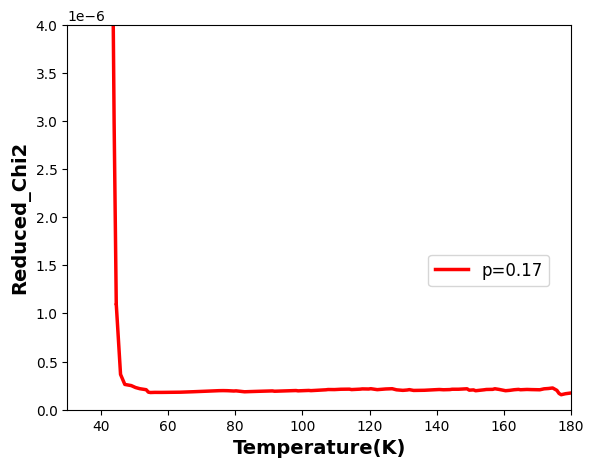

In [8]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(6.5,5))
ax.plot(df.index, df["redchi"], color="red", linewidth=2.5, label=f"p={p017.doping}")
ax.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.7, 0.3))
ax.set_xlabel("Temperature(K)", fontsize=14, fontweight='bold')
ax.set_ylabel("Reduced_Chi2", fontsize=14, fontweight='bold')
ax.set_ylim(0, 4e-6)
ax.set_xlim(30, 180)
#ax.text(65, 5.5e-8, "Red_Chi2", fontsize=14, color='red')
plt.plot()
#fig.savefig("paper_figs/new_FigS1e.png", dpi=200)

## b. plot the "scaled" reduced-Chi2 curve

In [9]:
T_base = 150  # Choose a "base" temperature
index = RT.nearest_index(p017.temperatures, T_base)
base_redchi = p017.results[index].redchi
p017.scaled_redchi = df["redchi"]/base_redchi

(0.0, 180.0)

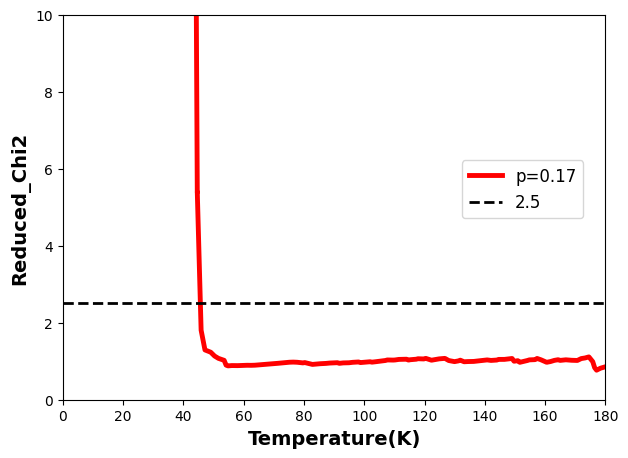

In [10]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(7,5))
ax.plot(df.index, p017.scaled_redchi.values, color='red', linewidth=3.5, label=f"p={p017.doping}")
#Plot the horizontal line of T*
h_line = np.linspace(0, 200, num=200)
line_1 = np.ones(len(h_line))  #The base_line for scaled_redchi=1
line_Tstar = line_1 * 2.5
ax.plot(h_line, line_Tstar, color='black', linestyle='--', linewidth=2, label="2.5")

ax.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.72, 0.45))
ax.set_xlabel("Temperature(K)", fontsize=14, fontweight='bold')
ax.set_ylabel("Reduced_Chi2", fontsize=14, fontweight='bold')
ax.set_ylim(0, 10)
ax.set_xlim(0, 180)

# 4. Obtain T* and make overlaid rho(T) plots

In [11]:
def cross_T(obj, value):
    '''
    returns the temperature at which the scaled_redchi of an object crosses 'value', if the crossing happens more than once, return the smallest temperature
    '''
    data = obj.scaled_redchi  # Obtain the pandas Series
    threshold = value
    crossings = (data >= threshold) != (data.shift(1) >= threshold)
    T_crossings = data.index[crossings].to_numpy()  # A numpy array of the T_crossing values
    return T_crossings[-1]

In [12]:
Tstar = cross_T(p017, 2.5)
p017.Tstar = Tstar

## Plot rho(T) overlaid with PLL fitting

(0.0, 0.25)

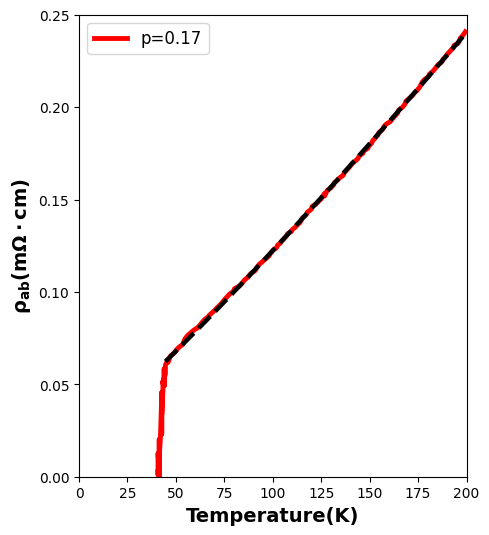

In [13]:
Tstar_index = RT.nearest_index(p017.Tdata, p017.Tstar)
xdata = p017.Tdata[Tstar_index:]
results = p017.get_result(p017.Tstar)

fig, ax = plt.subplots(figsize=(5,6))
ax.plot(p017.Tdata, p017.Rdata, color='red', linewidth=3.5, label=f"p={p017.doping}")
ax.plot(xdata, results.best_fit, color="black", linestyle="--", linewidth=3.2)
ax.legend(fontsize=12, loc='upper left')
ax.set_xlabel("Temperature(K)", fontsize=14, fontweight="bold")
ax.set_ylabel(r'$\mathbf{\rho_{ab}(m\Omega\cdot cm)}$', fontsize=14, fontweight="bold")
ax.set_xlim(0, 200)
ax.set_ylim(0, 0.25)
#fig.savefig("paper_figs_v5/Overlaid_RT_LSCO_cooper_pll2.png", dpi=200) 

# 5. Obtain the PLL parameters

In [14]:
params = p017.get_params(p017.Tstar)
params

{'R0': np.float64(0.021381072623314696),
 'A': np.float64(0.0014189316517281012),
 'alpha': np.float64(0.5582828400996859)}